# Lab | Random variable distributions

Refer to the files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv dataset.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

### 1. Get the numerical variables from our dataset.

In [5]:
numericals = data.select_dtypes(np.number)
numericals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        9134 non-null   float64
 1   Income                         9134 non-null   int64  
 2   Monthly Premium Auto           9134 non-null   int64  
 3   Months Since Last Claim        9134 non-null   int64  
 4   Months Since Policy Inception  9134 non-null   int64  
 5   Number of Open Complaints      9134 non-null   int64  
 6   Number of Policies             9134 non-null   int64  
 7   Total Claim Amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


### 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

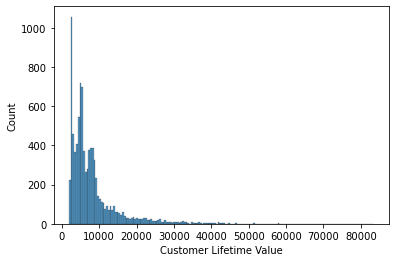

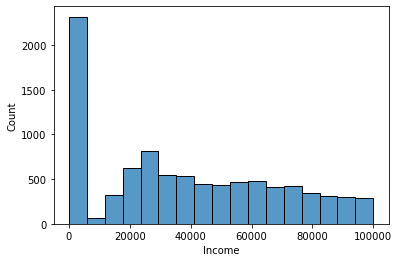

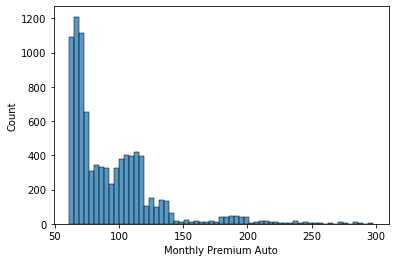

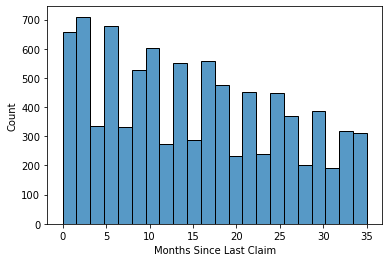

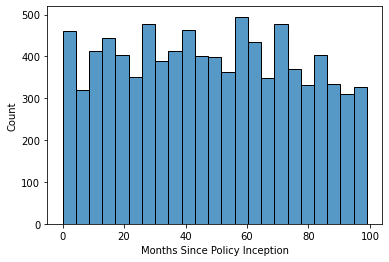

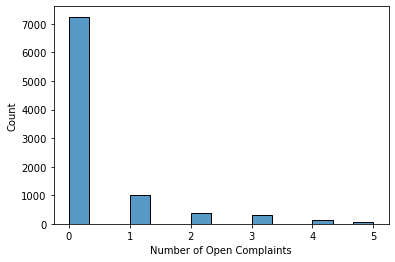

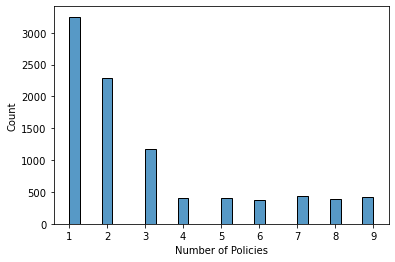

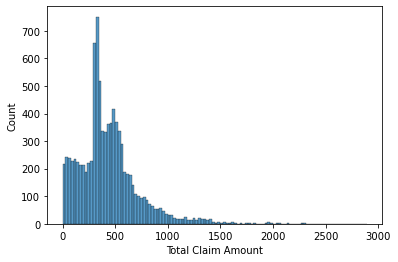

In [6]:
for column in numericals:
    sns.histplot(x=numericals[column])
    plt.show()

except the 'months since policy intercept ' and 'months since last claim' , all columns are towards normal distribution 

### 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [9]:
df = numericals.copy()

def boxcox_transform(df):
    numeric_cols = df.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) 
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column])
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

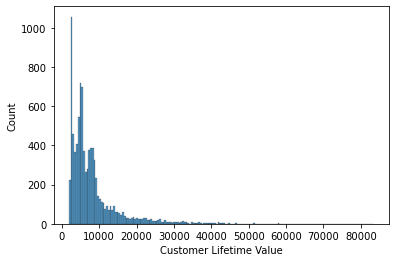

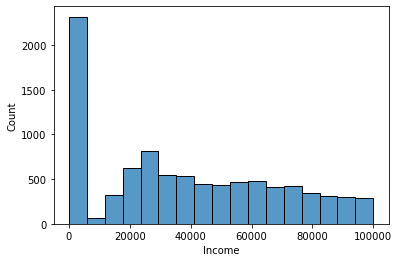

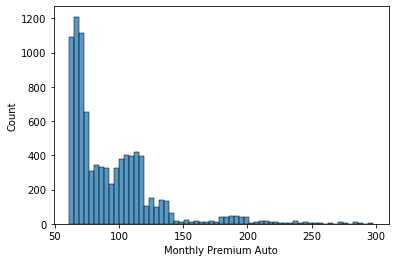

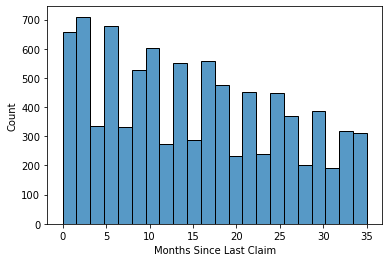

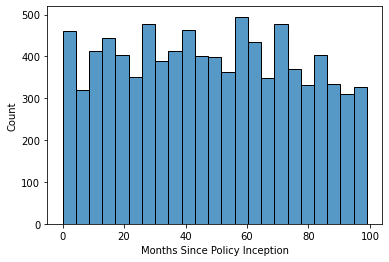

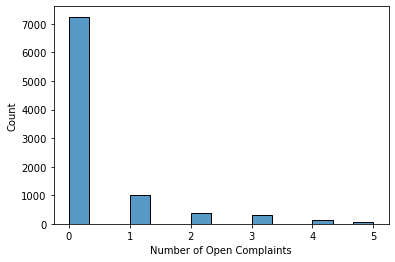

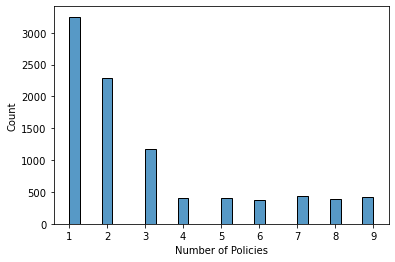

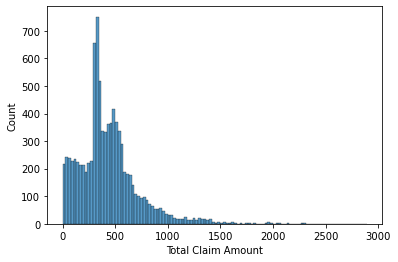

In [10]:
for column in df:
    sns.histplot(x=df[column])
    plt.show()

In [13]:
df2 = numericals.copy()

In [14]:
def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN

for column in df2:
    df2[column] = df2[column].apply(log_transfom_clean)

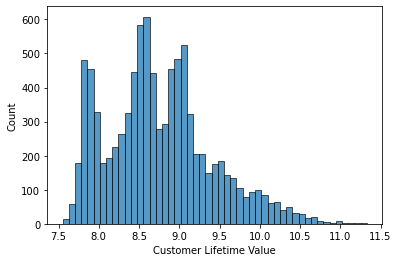

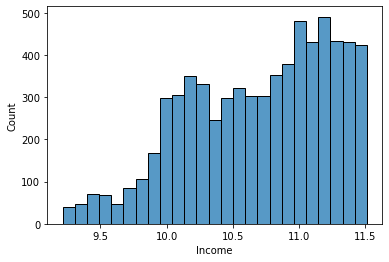

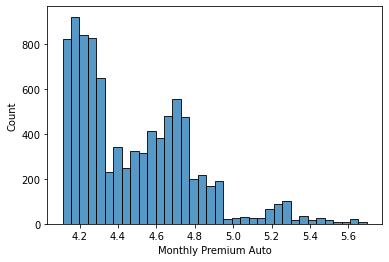

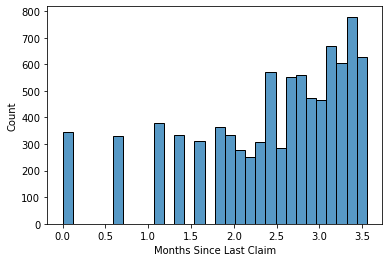

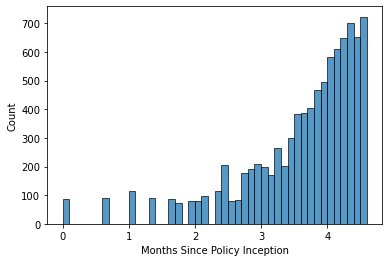

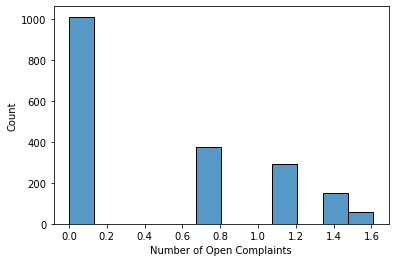

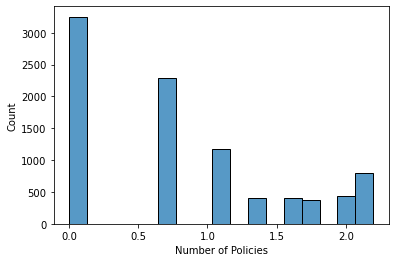

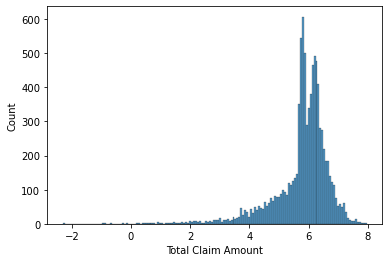

In [15]:
for column in df2:
    sns.histplot(x=df2[column])
    plt.show()

seemengly no difference from boxcox but noticable one with log transform one 